# Multiple Users' Reception in different Subreddits

Analysing the reception of users' comments in different subreddits. Reception is defined by the score.

Hypothesis - a regular Reddit user's reception in different subreddits will be consistent. A user active in an echo chamber will be well recieved in the echo chamber (and similar subs) but not in 'outside' subreddits. 

1. User's activity overview - Pie Chart
2. Activity in different subs over time - Scatter Plot
3. Reception of their comments and posts in different subreddits - Box Plots

## Authenticate into Reddit API

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import praw

reddit = praw.Reddit(client_id='1QKQYY6zEUgYUw',
                     client_secret='8xyLf9B_raDH9FIs54t3yzYqBqc',
                     password='redditpw',
                     user_agent='testscript by /u/praw_test_1',
                     username='praw_test_1')

In [56]:
reddit.config.store_json_result = True
sub_cmv = reddit.subreddit("changemyview")
sub_trp = reddit.subreddit("theredpill")

## User's activity posting and commenting

In [47]:
def user_activity(username):
    # POSTING ACTIVITY FOR USER
    sub_posts = []

    for submission in reddit.redditor(username).submissions.top('all'):
        sub_posts.append(submission.subreddit.display_name)

    l = list(numpy.array(sub_posts))
    unique, counts = numpy.unique(l, return_counts=True)

    
    # COMMENTS FOR A USER
    sub_comments = []

    for submission in reddit.redditor(username).comments.top('all'):
        sub_comments.append(submission.subreddit.display_name)

    k = list(numpy.array(sub_comments))
    unique_comments, counts_comments = numpy.unique(k, return_counts=True)

    
    # Visualise pie charts
    fig = plt.figure(figsize=(10,3))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    
    ax1.pie(counts, explode=None, labels=unique)
    ax1.set_title('Subreddits where user '+ username +' Posts')
    ax2.pie(counts_comments, explode=None, labels=unique_comments)
    ax2.set_title('Subreddits where user '+ username +' Comments')

    
    plt.show()
    
    
    # COMMENTS AND POSTS FOR A USER - IN TIME
    sub_name = []
    sub_id = []
    sub_time = []


    for comment in reddit.redditor(username).comments.top('all'):
        sub_name.append(comment.subreddit.display_name)
        sub_id.append(comment.id)
        sub_time.append(comment.created_utc)

    for post in reddit.redditor(username).submissions.top('all'):
        sub_name.append(post.subreddit.display_name)
        sub_id.append(post.id)
        sub_time.append(post.created_utc)
        
    df=pd.DataFrame({'x': sub_time, 'y1': sub_name})

    plt.scatter(sub_time, sub_name, alpha=0.5)
    plt.title('User participation in subreddits in time' )
    plt.show()

## User's Reception in different subs

In [59]:
def user_reception(username):

    # ACTIONS FOR A USER 
    action_content = []
    action_comment = []
    action_submission = []
    action_id = []
    action_time = []
    action_sub = []
    action_score = []

    # Loop through user's comments and posts to populate arrays
    for comment in reddit.redditor(username).comments.top('all'):
        action_content.append(comment.body)
        action_comment.append(1)
        action_submission.append(0)
        action_id.append(comment.id)
        action_time.append(comment.created_utc)
        action_sub.append(comment.subreddit.display_name)
        action_score.append(int(comment.score))

    for post in reddit.redditor(username).submissions.top('all'):
        action_content.append(post.title)
        action_comment.append(0)
        action_submission.append(1)
        action_id.append(post.id)
        action_time.append(post.created_utc)
        action_sub.append(post.subreddit.display_name)
        action_score.append(int(post.score))
        
    # create a dictionary
    ex_dic = {
        'sub': action_sub,
        'score': action_score
    }

    # Create columns
    columns = ['sub', 'score']


    # Create dataframe
    df_user_scores = pd.DataFrame(ex_dic, columns=columns)
    
    # Visualise
    fig = plt.figure(figsize=(12,4))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    df_user_scores.boxplot('score', 'sub', rot=90, ax=ax1)
    ax1.set_title('Reception of activity for user ' + username)
    plt.suptitle("")
    
    df_user_scores.boxplot('score', 'sub', rot=90, ax=ax2)
    ax2.set_title('(Log) Reception of activity for user ' + username)
    plt.yscale('symlog')
    plt.suptitle("")
    
    plt.show()

## Different user's graphs

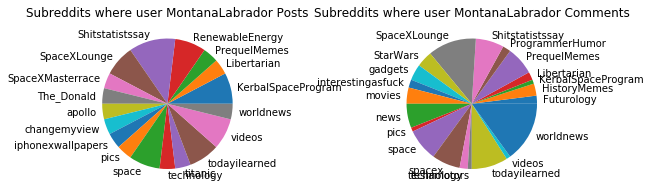

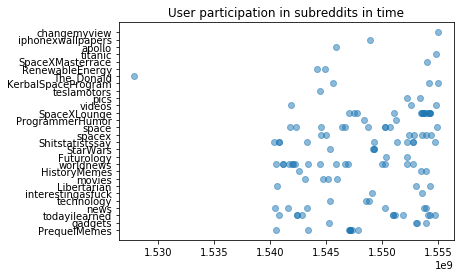

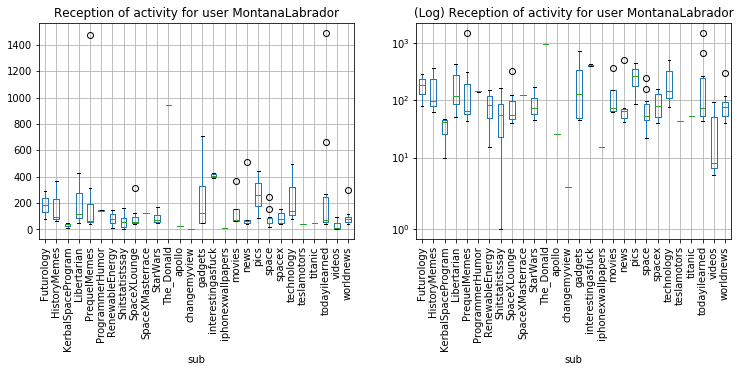

In [60]:
user_activity('MontanaLabrador')
user_reception('MontanaLabrador')

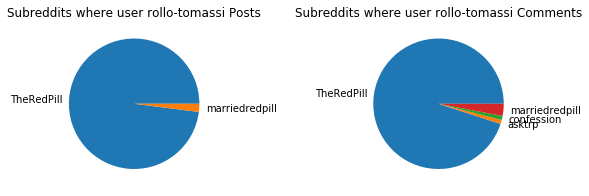

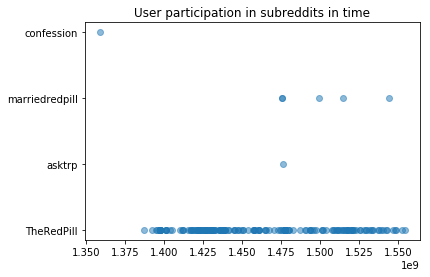

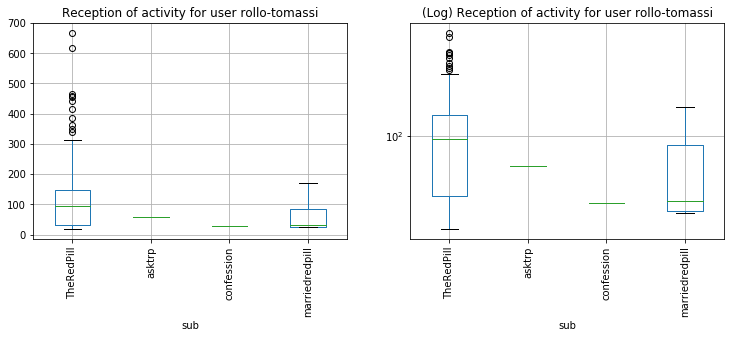

In [61]:
user_activity('rollo-tomassi')
user_reception('rollo-tomassi')

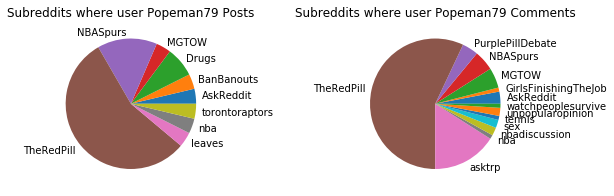

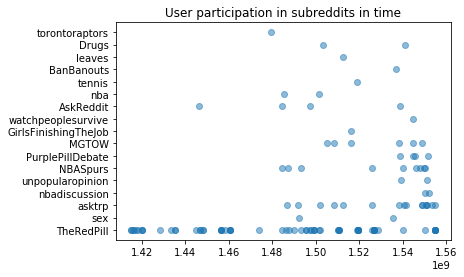

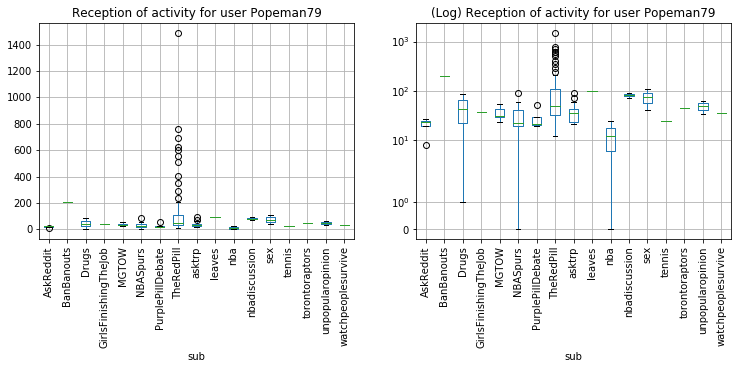

In [64]:
user_activity('Popeman79')
user_reception('Popeman79')

## Get the 10 latest users active in sub

Five Latest Users from ChangeMyView


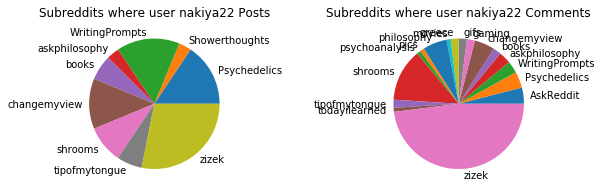

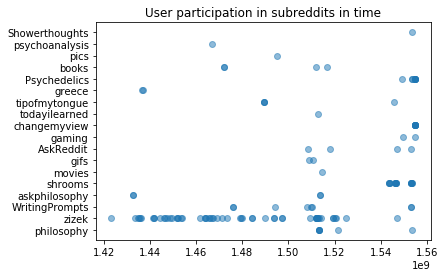

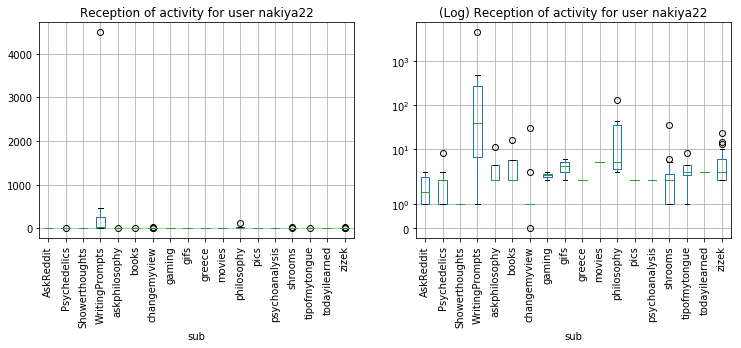

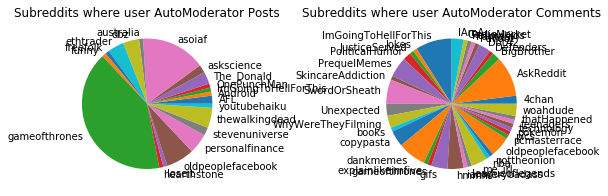

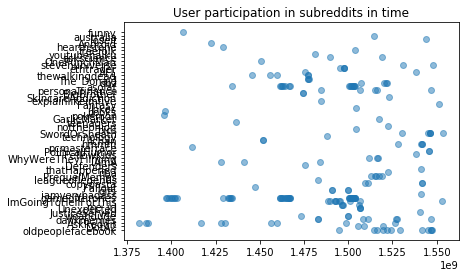

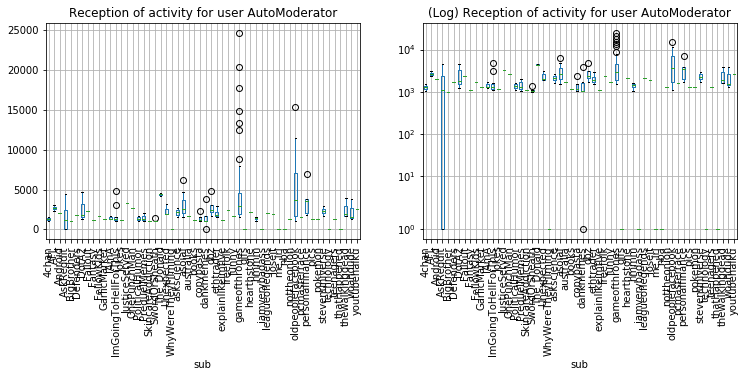

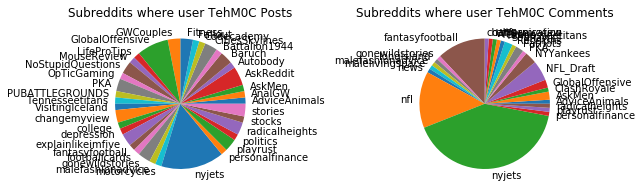

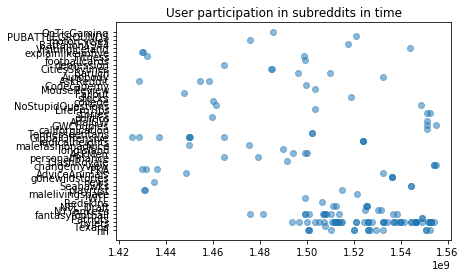

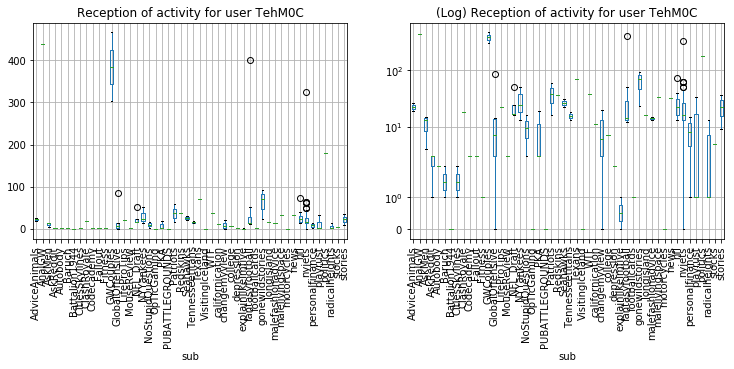

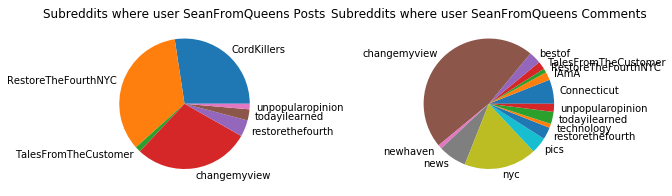

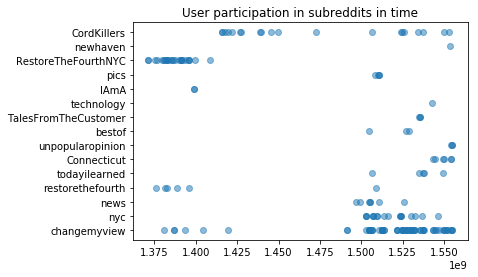

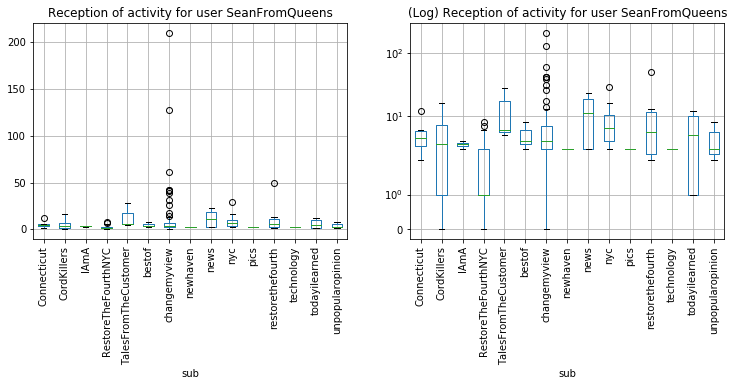

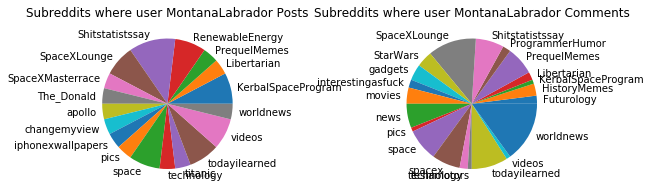

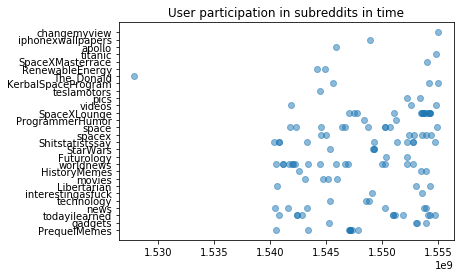

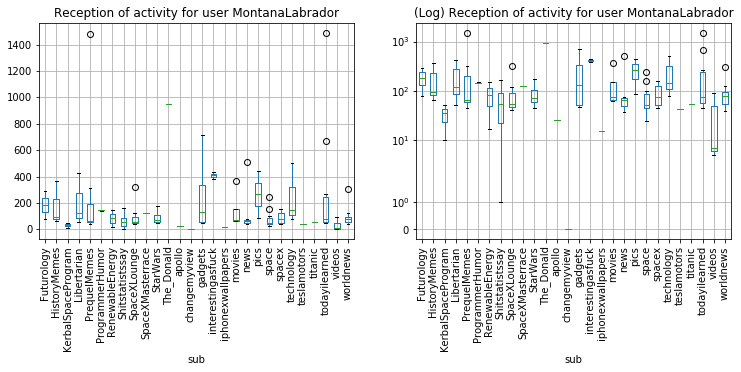

Five Latest Users from TheRedPill


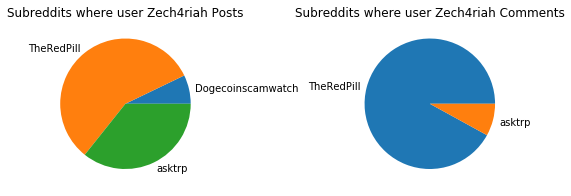

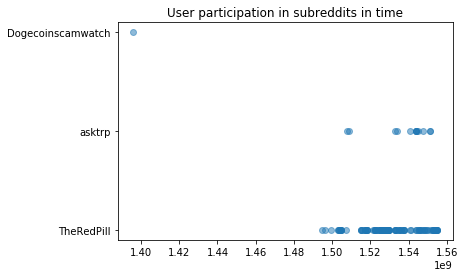

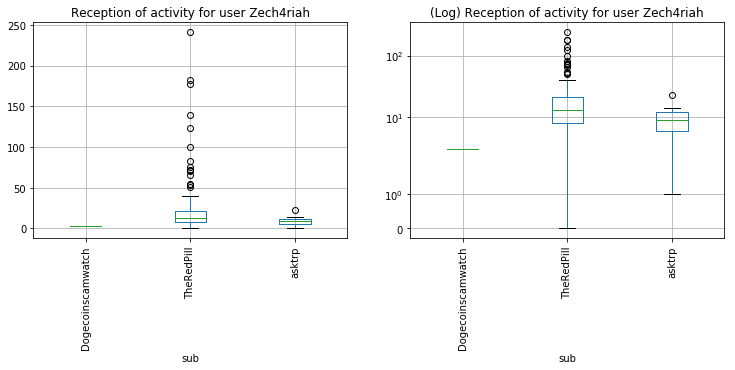

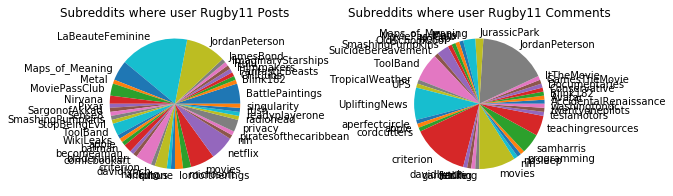

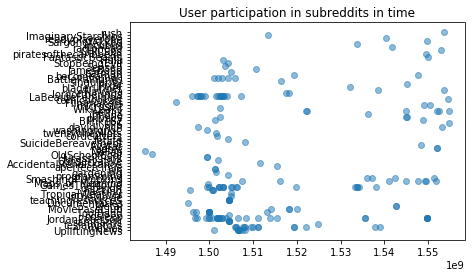

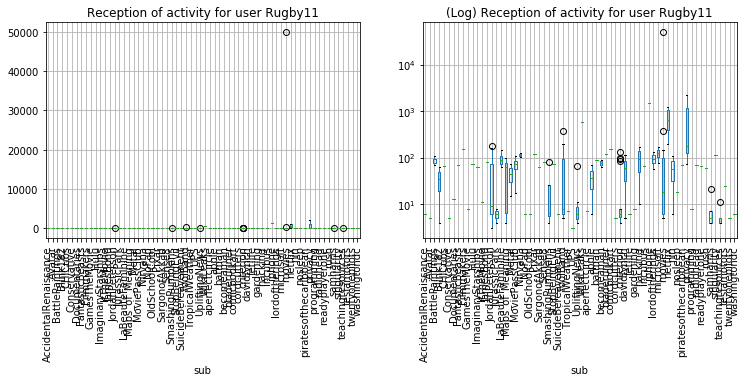

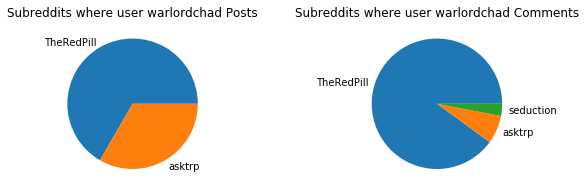

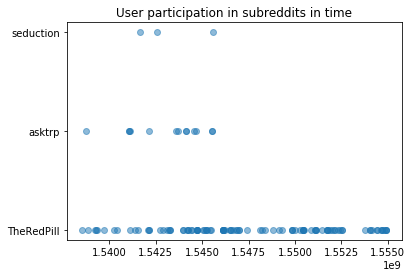

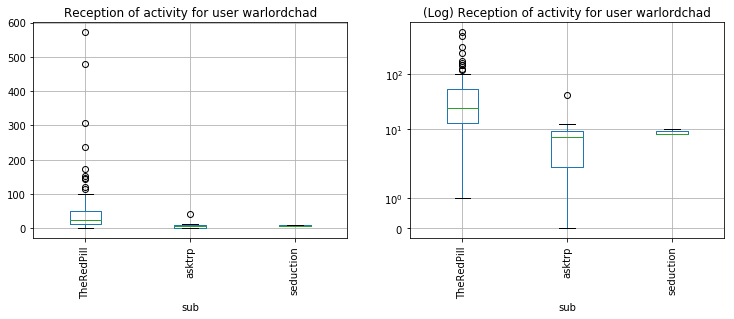

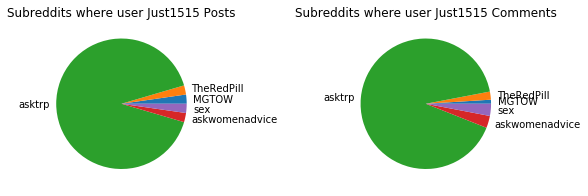

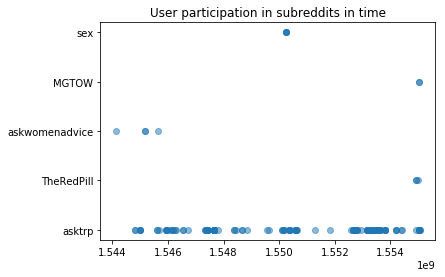

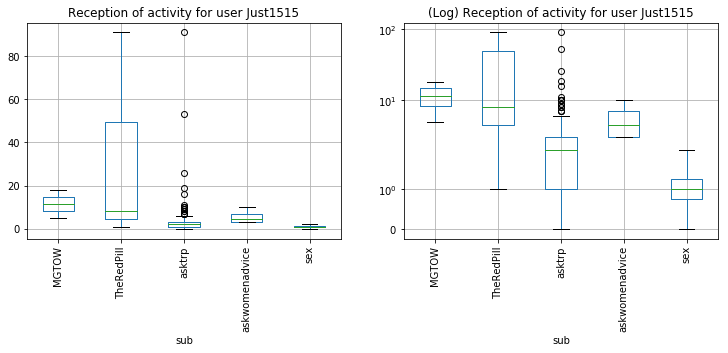

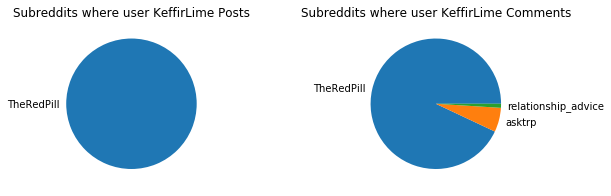

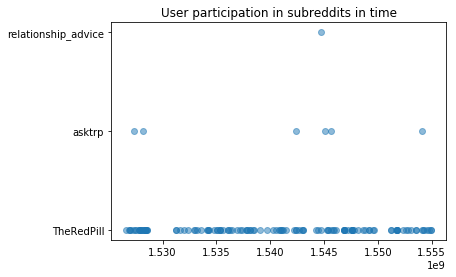

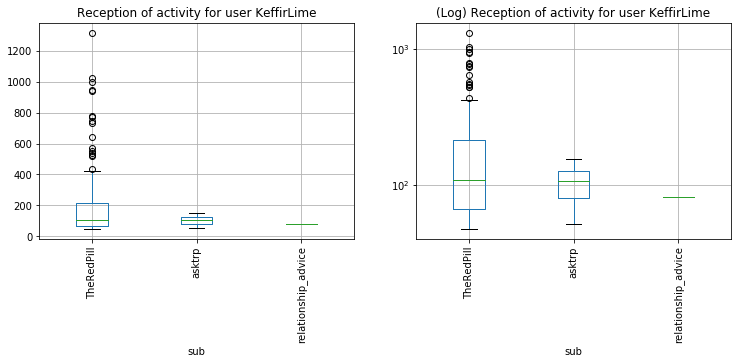

In [63]:
print('Five Latest Users from ChangeMyView')
for post in sub_cmv.new(limit=5):
    user_activity(post.author.name)
    user_reception(post.author.name)
    
print('Five Latest Users from TheRedPill')
for post in sub_trp.new(limit=5):
    user_activity(post.author.name)
    user_reception(post.author.name)